In [21]:
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/Users/jp/Desktop/Investment/trading_BOT/macd_long_backtester')
from macd_long_backtester import Macd_long_backtester

In [3]:
df_side = pd.read_csv('sideways.csv')

In [11]:
df_side

,interval_opt,macd_slow_opt,macd_fast_opt,macd_signal_opt,multiple_hold,multiple_macd_strategy,multiple_macd_strategy_net,trend_ref,start_opt,end_opt
0,15m,16,4,6,0.991700,1.058174,0.465412,EE,2018-08-11 00:00:00,2018-10-15 00:00:00
1,15m,16,4,10,0.991700,1.022814,0.504150,EE,2018-08-11 00:00:00,2018-10-15 00:00:00
2,15m,16,4,14,0.991700,0.983969,0.519143,EE,2018-08-11 00:00:00,2018-10-15 00:00:00
3,15m,16,4,18,0.991700,0.987105,0.554619,EE,2018-08-11 00:00:00,2018-10-15 00:00:00
4,15m,16,4,22,0.991700,0.987858,0.571323,EE,2018-08-11 00:00:00,2018-10-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...
3559,1h,36,12,10,0.958424,1.068867,0.981739,NN,2020-05-08 00:00:00,2020-07-20 00:00:00
3560,1h,36,12,14,0.958424,1.130066,1.048594,NN,2020-05-08 00:00:00,2020-07-20 00:00:00
3561,1h,36,12,18,0.958424,1.055744,0.976305,NN,2020-05-08 00:00:00,2020-07-20 00:00:00
3562,1h,36,12,22,0.958424,1.037076,0.963946,NN,2020-05-08 00:00:00,2020-07-20 00:00:00


In [9]:
df_side_15m = df_side[df_side.interval_opt == '15m']

In [14]:
df_side_15m_one = df_side_15m[df_side_15m.multiple_macd_strategy > 1]

In [17]:
df_side_15m_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 3327
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interval_opt                281 non-null    object 
 1   macd_slow_opt               281 non-null    int64  
 2   macd_fast_opt               281 non-null    int64  
 3   macd_signal_opt             281 non-null    int64  
 4   multiple_hold               281 non-null    float64
 5   multiple_macd_strategy      281 non-null    float64
 6   multiple_macd_strategy_net  281 non-null    float64
 7   trend_ref                   281 non-null    object 
 8   start_opt                   281 non-null    object 
 9   end_opt                     281 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 24.1+ KB


In [16]:
df_side_15m_one.describe()

,macd_slow_opt,macd_fast_opt,macd_signal_opt,multiple_hold,multiple_macd_strategy,multiple_macd_strategy_net
count,281.000000,281.00000,281.000000,281.000000,281.000000,281.000000
mean,24.701068,8.55516,14.683274,0.992009,1.030121,0.630037
std,6.618936,3.00083,6.093560,0.174781,0.025876,0.114671
min,16.000000,4.00000,6.000000,0.702748,1.000000,0.278627
25%,19.000000,8.00000,10.000000,0.991700,1.009826,0.560309
50%,24.000000,8.00000,14.000000,0.991700,1.022624,0.665414
75%,30.000000,12.00000,18.000000,0.991700,1.043103,0.715191
max,39.000000,12.00000,26.000000,1.258419,1.146178,0.808314


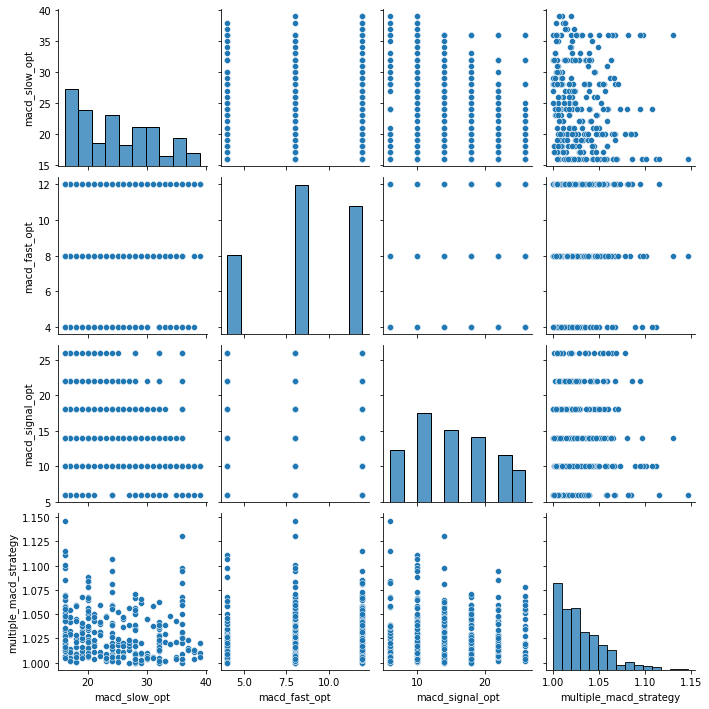

In [19]:
sns.pairplot(df_side_15m_one[['macd_slow_opt', 'macd_fast_opt', 'macd_signal_opt', 'multiple_macd_strategy']])

In [20]:
df_side_15m_one[df_side_15m_one.multiple_macd_strategy == df_side_15m_one.multiple_macd_strategy.max()]

,interval_opt,macd_slow_opt,macd_fast_opt,macd_signal_opt,multiple_hold,multiple_macd_strategy,multiple_macd_strategy_net,trend_ref,start_opt,end_opt
1302,15m,16,8,6,1.258419,1.146178,0.417046,GG,2018-12-16 00:00:00,2019-03-25 00:00:00


In [22]:
test = Macd_long_backtester('BTCUSDT')